In [2]:
import os
import torch
import matplotlib.pyplot as plt

In [7]:
def get_mean_se(losses):
    mean = torch.mean(losses, dim=2).mean(dim=1)
    se = torch.mean(losses, dim=2).std(dim=1)
    se /= losses.shape[1]**0.5
    return mean, se

def plot_experiment(data_type, num_train, num_pool, max_choice, num_test, num_rollouts, rollout_length, model_epoch, seed, std=1):
    save_folder = f"/shared/share_mala/tyen/seqb/results/{data_type}"
    save_folder = os.path.join(
        save_folder,
        f"num_train={num_train}_num_pool={num_pool}_max-choice={max_choice}_num_test={num_test}_num_rollouts={num_rollouts}_rollout_length={rollout_length}_model-epoch={model_epoch}_seed={seed}",
    )
    print(save_folder)

    autoreg_rollout_losses = torch.load(f'{save_folder}/autoreg_rollout_losses.pt', weights_only=True)
    autoreg_oneshot_losses = torch.load(f'{save_folder}/autoreg_oneshot_losses.pt', weights_only=True)
    try:
        excg_rollout_losses = torch.load(f'{save_folder}/excg_rollout_losses.pt', weights_only=True)
        excg_oneshot_losses = torch.load(f'{save_folder}/excg_oneshot_losses.pt', weights_only=True)
    except:
        excg_rollout_losses = torch.load(f'{save_folder}/pfn_rollout_losses.pt', weights_only=True)
        excg_oneshot_losses = torch.load(f'{save_folder}/pfn_oneshot_losses.pt', weights_only=True)

    autoreg_rollout_mean, autoreg_rollout_se = get_mean_se(autoreg_rollout_losses)
    autoreg_oneshot_mean, autoreg_oneshot_se = get_mean_se(autoreg_oneshot_losses)
    excg_rollout_mean, excg_rollout_se = get_mean_se(excg_rollout_losses)
    excg_oneshot_mean, excg_oneshot_se = get_mean_se(excg_oneshot_losses)

    num_chosen_labels = range(1, len(autoreg_rollout_mean)+1)

    plt.xlabel("Number of revealed labels")
    plt.ylabel("Loss (negative logprob)")
    plt.plot(num_chosen_labels, autoreg_rollout_mean , label='autoreg rollout')
    plt.fill_between(num_chosen_labels, autoreg_rollout_mean - std * autoreg_rollout_se, autoreg_rollout_mean + std * autoreg_rollout_se, alpha=0.3)

    plt.plot(num_chosen_labels, autoreg_oneshot_mean, label='autoreg oneshot')
    plt.fill_between(num_chosen_labels, autoreg_oneshot_mean - std * autoreg_oneshot_se, autoreg_oneshot_mean + std * autoreg_oneshot_se, alpha=0.3)

    plt.plot(num_chosen_labels, excg_rollout_mean, label='excg rollout')
    plt.fill_between(num_chosen_labels, excg_rollout_mean - std * excg_rollout_se, excg_rollout_mean + std * excg_rollout_se, alpha=0.3)

    plt.plot(num_chosen_labels, excg_oneshot_mean, label='excg oneshot')
    plt.fill_between(num_chosen_labels, excg_oneshot_mean - std * excg_oneshot_se, excg_oneshot_mean + std * excg_oneshot_se, alpha=0.3)

    plt.legend()
    plt.show()

In [ ]:
params = {
    "data_type": "al_regions_v2_50",
    "num_train": 5,
    "num_pool": 95,
    "max_choice": 20,
    "num_test": 100,
    "num_rollouts": 20,
    "rollout_length": 20,
    "model_epoch": 200,
    "gpu_id": 7,
    "seed": 42,
}
data_type = params["data_type"]
num_train = params["num_train"]
num_pool = params["num_pool"]
max_choice = params["max_choice"]
num_test = params["num_test"]
num_rollouts = params["num_rollouts"]
rollout_length = params["rollout_length"]
model_epoch = params["model_epoch"]
seed = params["seed"]
nstd = 3

save_folder = f"/shared/share_mala/tyen/seqb/results/al_{data_type}"
save_folder = os.path.join(
    save_folder,
    f"num_train={num_train}_num_pool={num_pool}_max-choice={max_choice}_num_test={num_test}_num_rollouts={num_rollouts}_rollout_length={rollout_length}_model-epoch={model_epoch}_seed={seed}",
)
print(save_folder)

autoreg_rollout_losses = torch.load(f'{save_folder}/autoreg_rollout_losses.pt', weights_only=True)
autoreg_oneshot_losses = torch.load(f'{save_folder}/autoreg_oneshot_losses.pt', weights_only=True)
try:
    excg_rollout_losses = torch.load(f'{save_folder}/excg_rollout_losses.pt', weights_only=True)
    excg_oneshot_losses = torch.load(f'{save_folder}/excg_oneshot_losses.pt', weights_only=True)
except:
    excg_rollout_losses = torch.load(f'{save_folder}/pfn_rollout_losses.pt', weights_only=True)
    excg_oneshot_losses = torch.load(f'{save_folder}/pfn_oneshot_losses.pt', weights_only=True)

autoreg_rollout_mean, autoreg_rollout_se = get_mean_se(autoreg_rollout_losses)
autoreg_oneshot_mean, autoreg_oneshot_se = get_mean_se(autoreg_oneshot_losses)
excg_rollout_mean, excg_rollout_se = get_mean_se(excg_rollout_losses)
excg_oneshot_mean, excg_oneshot_se = get_mean_se(excg_oneshot_losses)

num_chosen_labels = range(1, len(autoreg_rollout_mean)+1)

/shared/share_mala/tyen/seqb/results/al_al_regions_v2_50/num_train=5_num_pool=95_max-choice=20_num_test=100_num_rollouts=20_rollout_length=20_model-epoch=200_seed=42


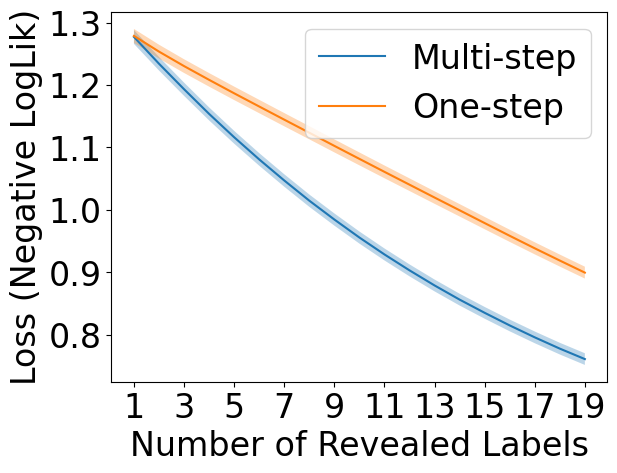

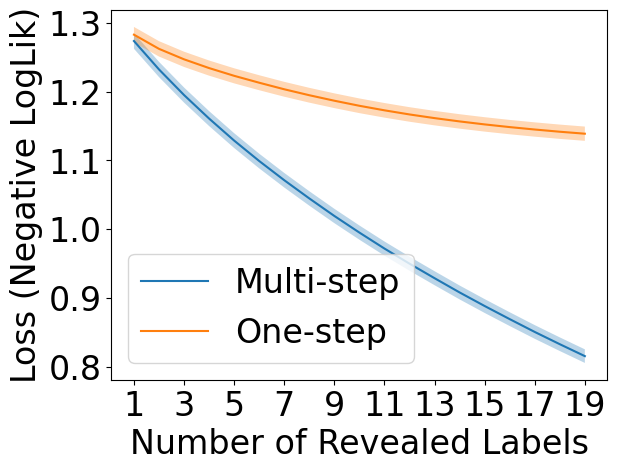

In [ ]:
fs = 24
plt.figure()
plt.xlabel("Number of Revealed Labels", fontsize=fs)
plt.ylabel("Loss (Negative LogLik)", fontsize=fs)
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19], fontsize=fs)
plt.yticks(fontsize=fs)
plt.plot(num_chosen_labels, autoreg_rollout_mean , label='Multi-step')
plt.fill_between(num_chosen_labels, autoreg_rollout_mean - nstd * autoreg_rollout_se, autoreg_rollout_mean + nstd * autoreg_rollout_se, alpha=0.3)
plt.plot(num_chosen_labels, autoreg_oneshot_mean, label='One-step')
plt.fill_between(num_chosen_labels, autoreg_oneshot_mean - nstd * autoreg_oneshot_se, autoreg_oneshot_mean + nstd * autoreg_oneshot_se, alpha=0.3)
plt.legend(fontsize=fs)
plt.savefig(f"{params['data_type']}_autoreg.pdf", bbox_inches='tight')
plt.show()

plt.figure()
plt.xlabel("Number of Revealed Labels", fontsize=fs)
plt.ylabel("Loss (Negative LogLik)", fontsize=fs)
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19], fontsize=fs)
plt.yticks(fontsize=fs)
plt.plot(num_chosen_labels, excg_rollout_mean, label='Multi-step')
plt.fill_between(num_chosen_labels, excg_rollout_mean - nstd * excg_rollout_se, excg_rollout_mean + nstd * excg_rollout_se, alpha=0.3)
plt.plot(num_chosen_labels, excg_oneshot_mean, label='One-step')
plt.fill_between(num_chosen_labels, excg_oneshot_mean - nstd * excg_oneshot_se, excg_oneshot_mean + nstd * excg_oneshot_se, alpha=0.3)
plt.legend(fontsize=fs)
plt.savefig(f"{params['data_type']}excg.pdf", bbox_inches='tight')
plt.show()
